In [1]:
import pandas as pd
import numpy as np
from scripts_python import acquire, prepare, wrangle


In [2]:
# read in history file
svi = pd.read_csv('data_csv_files/SVI_history.csv', index_col=0)

In [3]:
svi.head()

,county,tract,raw_svi2018,raw_svi2016,raw_svi2014,r_soci_total2018,r_comp_total2018,r_status_total2018,r_trans_total2018,r_soci_total2016,r_comp_total2016,r_status_total2016,r_trans_total2016,r_soci_total2014,r_comp_total2014,r_status_total2014,r_trans_total2014,est_population2018,est_population2016,est_population2014
40,Anderson,48001950500,0.9336,0.7724,0.8507,0.7946,0.8089,0.8392,0.9363,0.7477,0.7710,0.6158,0.7594,0.7497,0.9437,0.5644,0.8635,4569,4680.0,4666.0
41,Anderson,48001950600,0.6993,0.5937,0.6330,0.6486,0.5543,0.5934,0.7354,0.4270,0.5256,0.4870,0.8486,0.4403,0.8119,0.4816,0.7999,5570,6524.0,6480.0
42,Anderson,48001950800,0.6501,0.4758,0.4552,0.5890,0.7410,0.6780,0.4751,0.3497,0.3918,0.3069,0.8152,0.2755,0.4677,0.2284,0.8515,5584,5014.0,4937.0
43,Andrews,48003950100,0.3216,0.1359,0.1986,0.4012,0.2134,0.7844,0.1515,0.1101,0.2792,0.2453,0.1677,0.1385,0.4161,0.3034,0.2233,2254,2162.0,1994.0
44,Andrews,48003950200,0.6865,0.5578,0.3609,0.6386,0.1974,0.8127,0.7749,0.5233,0.2156,0.6035,0.7498,0.3266,0.2903,0.5014,0.4356,7281,7121.0,6877.0


**adding calculated columns**

In [4]:
svi['rising'] = np.where(((svi.raw_svi2016 > svi.raw_svi2014) & (svi.raw_svi2018 > svi.raw_svi2016)), 1, 0)

In [5]:
svi['falling'] = np.where(((svi.raw_svi2016 < svi.raw_svi2014) & (svi.raw_svi2018 < svi.raw_svi2016)), 1, 0)

In [6]:
svi['delta'] = svi.raw_svi2018 - svi.raw_svi2014

In [7]:
svi['avg3yr'] = (svi.raw_svi2018 + svi.raw_svi2016 + svi.raw_svi2014)/3

In [8]:
svi['r_soci_rise'] = np.where(((svi.r_soci_total2016 > svi.r_soci_total2014) & (svi.r_soci_total2018 > svi.r_soci_total2016)), 1, 0)

In [9]:
svi['r_comp_rise'] = np.where(((svi.r_comp_total2016 > svi.r_comp_total2014) & (svi.r_comp_total2018 > svi.r_comp_total2016)), 1, 0)

In [10]:
svi['r_status_rise'] = np.where(((svi.r_status_total2016 > svi.r_status_total2014) & (svi.r_status_total2018 > svi.r_status_total2016)), 1, 0)

In [11]:
svi['r_trans_rise'] = np.where(((svi.r_trans_total2016 > svi.r_trans_total2014) & (svi.r_trans_total2018 > svi.r_trans_total2016)), 1, 0)

In [12]:
svi['r_soci_fall'] = np.where(((svi.r_soci_total2016 < svi.r_soci_total2014) & (svi.r_soci_total2018 < svi.r_soci_total2016)), 1, 0)

In [13]:
svi['r_comp_fall'] = np.where(((svi.r_comp_total2016 < svi.r_comp_total2014) & (svi.r_comp_total2018 < svi.r_comp_total2016)), 1, 0)

In [14]:
svi['r_status_fall'] = np.where(((svi.r_status_total2016 < svi.r_status_total2014) & (svi.r_status_total2018 < svi.r_status_total2016)), 1, 0)

In [15]:
svi['r_trans_fall'] = np.where(((svi.r_trans_total2016 < svi.r_trans_total2014) & (svi.r_trans_total2018 < svi.r_trans_total2016)), 1, 0)

In [16]:
svi.head()

,county,tract,raw_svi2018,raw_svi2016,raw_svi2014,r_soci_total2018,r_comp_total2018,r_status_total2018,r_trans_total2018,r_soci_total2016,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
40,Anderson,48001950500,0.9336,0.7724,0.8507,0.7946,0.8089,0.8392,0.9363,0.7477,...,0.0829,0.852233,0,0,1,0,0,0,0,0
41,Anderson,48001950600,0.6993,0.5937,0.6330,0.6486,0.5543,0.5934,0.7354,0.4270,...,0.0663,0.642000,0,0,1,0,0,0,0,0
42,Anderson,48001950800,0.6501,0.4758,0.4552,0.5890,0.7410,0.6780,0.4751,0.3497,...,0.1949,0.527033,1,0,1,0,0,0,0,1
43,Andrews,48003950100,0.3216,0.1359,0.1986,0.4012,0.2134,0.7844,0.1515,0.1101,...,0.1230,0.218700,0,0,0,0,0,1,0,1
44,Andrews,48003950200,0.6865,0.5578,0.3609,0.6386,0.1974,0.8127,0.7749,0.5233,...,0.3256,0.535067,1,0,1,1,0,1,0,0


In [17]:
# filter to Bexar and Dallas counties
dsvi = svi[svi.county == 'Dallas']
dsvi

,county,tract,raw_svi2018,raw_svi2016,raw_svi2014,r_soci_total2018,r_comp_total2018,r_status_total2018,r_trans_total2018,r_soci_total2016,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
662,Dallas,48113000100,0.0457,0.0568,0.0595,0.0644,0.0395,0.3967,0.1709,0.0844,...,-0.0138,0.054000,0,0,0,0,0,0,0,0
663,Dallas,48113000201,0.0059,0.0113,0.0237,0.0052,0.0416,0.3835,0.0396,0.0071,...,-0.0178,0.013633,0,0,1,0,1,1,0,0
664,Dallas,48113000202,0.1401,0.0877,0.0545,0.0187,0.0845,0.4722,0.4951,0.0650,...,0.0856,0.094100,0,1,1,1,0,0,0,0
665,Dallas,48113000300,0.0334,0.0058,0.0065,0.1064,0.0351,0.5250,0.0633,0.0207,...,0.0269,0.015233,0,1,1,0,0,0,0,1
666,Dallas,48113001001,0.0479,0.0382,0.1217,0.0746,0.0634,0.4762,0.0935,0.0345,...,-0.0738,0.069267,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219,Dallas,48113012208,0.9648,0.9678,0.9885,0.9857,0.8112,0.9731,0.7344,0.9944,...,-0.0237,0.973700,0,0,1,0,1,1,0,1
5220,Dallas,48113013713,0.9529,0.9065,0.9277,0.9150,0.6002,0.9804,0.8957,0.8143,...,0.0252,0.929033,0,1,0,0,0,0,0,1
5221,Dallas,48113017001,0.9266,0.8084,0.6713,0.7051,0.8204,0.8645,0.9627,0.6511,...,0.2553,0.802100,1,1,1,1,0,0,0,0
5222,Dallas,48113019013,0.9764,0.9964,0.9981,0.9477,0.5694,0.9886,0.9598,0.9893,...,-0.0217,0.990300,0,0,1,0,1,1,0,1


In [18]:
sasvi = svi[svi.county =='Bexar']
sasvi

,county,tract,raw_svi2018,raw_svi2016,raw_svi2014,r_soci_total2018,r_comp_total2018,r_status_total2018,r_trans_total2018,r_soci_total2016,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
116,Bexar,48029120300,0.2925,0.2695,0.1751,0.0710,0.6114,0.3725,0.5166,0.1026,...,0.1174,0.245700,0,0,0,1,1,0,0,0
117,Bexar,48029120400,0.1349,0.0958,0.1364,0.0021,0.5817,0.3154,0.2741,0.0040,...,-0.0015,0.122367,0,0,0,0,1,0,0,0
118,Bexar,48029120501,0.8986,0.8159,0.8462,0.7404,0.9239,0.8831,0.7674,0.5126,...,0.0524,0.853567,0,0,1,0,0,1,0,0
119,Bexar,48029120600,0.4639,0.5052,0.4093,0.4852,0.2332,0.6490,0.4650,0.4638,...,0.0546,0.459467,1,0,1,0,0,0,0,0
120,Bexar,48029120800,0.1433,0.1246,0.1713,0.0290,0.5434,0.2772,0.2570,0.0848,...,-0.0280,0.146400,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,Bexar,48029190100,0.9457,0.8649,0.8932,0.8606,0.5934,0.9177,0.9549,0.7988,...,0.0525,0.901267,0,0,0,0,0,1,0,0
4778,Bexar,48029191410,0.4986,0.2868,0.3111,0.4502,0.0850,0.8452,0.6147,0.2887,...,0.1875,0.365500,0,0,0,1,0,0,0,0
4779,Bexar,48029980100,0.2563,0.2136,0.1699,0.3631,0.2539,0.2632,0.3275,0.2269,...,0.0864,0.213267,1,1,0,0,0,0,1,0
5204,Bexar,48029110100,0.7508,0.7069,0.6745,0.5569,0.2086,0.8646,0.9475,0.4612,...,0.0763,0.710733,1,0,1,0,0,1,0,0


# Questions
- overall county mean for both counties by year? total?
- overall is county rising? falling? neither?
- delta for both counties?
- average scores for all raw and r columns for each county?
- how many tracks risiing? falling? neither? by county?
- other patterns?

In [19]:
svi.columns

Index(['county', 'tract', 'raw_svi2018', 'raw_svi2016', 'raw_svi2014',
       'r_soci_total2018', 'r_comp_total2018', 'r_status_total2018',
       'r_trans_total2018', 'r_soci_total2016', 'r_comp_total2016',
       'r_status_total2016', 'r_trans_total2016', 'r_soci_total2014',
       'r_comp_total2014', 'r_status_total2014', 'r_trans_total2014',
       'est_population2018', 'est_population2016', 'est_population2014',
       'rising', 'falling', 'delta', 'avg3yr', 'r_soci_rise', 'r_comp_rise',
       'r_status_rise', 'r_trans_rise', 'r_soci_fall', 'r_comp_fall',
       'r_status_fall', 'r_trans_fall'],
      dtype='object')

In [20]:
# aggregate columns by county
raw_compdf = svi.groupby(['county'])['raw_svi2018', 'raw_svi2016', 'raw_svi2014', 'delta', 'avg3yr', 
       'r_soci_total2018', 'r_comp_total2018', 'r_status_total2018',
       'r_trans_total2018', 'r_soci_total2016', 'r_comp_total2016',
       'r_status_total2016', 'r_trans_total2016', 'r_soci_total2014',
       'r_comp_total2014', 'r_status_total2014', 'r_trans_total2014'].agg({'raw_svi2018':['min', 'max','mean'], 
                                             'raw_svi2016':['min', 'max','mean'], 
                                            'raw_svi2014':['min', 'max','mean'], 'delta':['min', 'max','mean'], 
                                             'avg3yr':['min', 'max','mean'],
                                             'r_soci_total2018':['mean'],
                                             'r_comp_total2018':['mean'], 
                                             'r_status_total2018':['mean'],
                                             'r_trans_total2018':['mean'], 
                                             'r_soci_total2016':['mean'], 
                                             'r_comp_total2016':['mean'], 
                                             'r_status_total2016':['mean'], 
                                             'r_trans_total2016':['mean'], 
                                             'r_soci_total2014':['mean'], 
                                             'r_comp_total2014':['mean'], 
                                             'r_status_total2014':['mean'], 
                                             'r_trans_total2014':['mean']})

In [21]:
# aggregate columns by sum
sum_compdf = svi.groupby(['county'])['rising', 'falling', 'r_soci_rise', 'r_comp_rise',
       'r_status_rise', 'r_trans_rise', 'r_soci_fall', 'r_comp_fall',
       'r_status_fall', 'r_trans_fall'].agg({'rising':['sum'], 'falling':['sum'],  'r_soci_rise':['sum'], 
                                             'r_comp_rise':['sum'], 'r_status_rise':['sum'], 
                                             'r_trans_rise':['sum'], 'r_soci_fall':['sum'], 'r_comp_fall':['sum'], 
                                             'r_status_fall':['sum'], 'r_trans_fall':['sum']})

In [22]:
# flatten column headers
raw_compdf.columns = [' '.join(col).strip() for col in raw_compdf.columns.values]
raw_compdf = raw_compdf.reset_index()

In [23]:
# flatten column headers
sum_compdf.columns = [' '.join(col).strip() for col in sum_compdf.columns.values]
sum_compdf = sum_compdf.reset_index()

In [24]:
# filter for only Dallas 
rd_comp = raw_compdf[raw_compdf.county == 'Dallas']
sd_comp = sum_compdf[sum_compdf.county == 'Dallas']


In [25]:
# filter for only  Bexar
rs_comp = raw_compdf[raw_compdf.county == 'Bexar']
ss_comp = sum_compdf[sum_compdf.county == 'Bexar']

In [26]:
# better idea, single filter for to get both counties
rbdcomp = raw_compdf[(raw_compdf.county == 'Dallas') | (raw_compdf.county == 'Bexar')]
rbdcomp

,county,raw_svi2018 min,raw_svi2018 max,raw_svi2018 mean,raw_svi2016 min,raw_svi2016 max,raw_svi2016 mean,raw_svi2014 min,raw_svi2014 max,raw_svi2014 mean,...,r_status_total2018 mean,r_trans_total2018 mean,r_soci_total2016 mean,r_comp_total2016 mean,r_status_total2016 mean,r_trans_total2016 mean,r_soci_total2014 mean,r_comp_total2014 mean,r_status_total2014 mean,r_trans_total2014 mean
14,Bexar,0.0099,0.9999,0.616627,0.0081,0.9994,0.535879,0.0033,0.9983,0.53262,...,0.788722,0.489729,0.516386,0.560888,0.597012,0.482740,0.512910,0.552460,0.596702,0.485589
56,Dallas,0.0002,0.9998,0.579433,0.0004,0.9969,0.516690,0.0008,0.9981,0.51752,...,0.791684,0.479128,0.528207,0.420364,0.626319,0.476382,0.534591,0.424619,0.619259,0.478478


In [27]:
# better idea, single filter for to get both counties
sbdcomp = sum_compdf[(sum_compdf.county == 'Dallas') | (sum_compdf.county == 'Bexar')]
sbdcomp

,county,rising sum,falling sum,r_soci_rise sum,r_comp_rise sum,r_status_rise sum,r_trans_rise sum,r_soci_fall sum,r_comp_fall sum,r_status_fall sum,r_trans_fall sum
14,Bexar,164,29,138,107,188,92,47,83,3,73
56,Dallas,204,70,157,133,282,128,102,146,2,121


**resetting index to county**

In [28]:
rbdcomp = rbdcomp.set_index('county')

In [29]:
sbdcomp = sbdcomp.set_index('county')

In [30]:
rbdcomp

,raw_svi2018 min,raw_svi2018 max,raw_svi2018 mean,raw_svi2016 min,raw_svi2016 max,raw_svi2016 mean,raw_svi2014 min,raw_svi2014 max,raw_svi2014 mean,delta min,...,r_status_total2018 mean,r_trans_total2018 mean,r_soci_total2016 mean,r_comp_total2016 mean,r_status_total2016 mean,r_trans_total2016 mean,r_soci_total2014 mean,r_comp_total2014 mean,r_status_total2014 mean,r_trans_total2014 mean
county,,,,,,,,,,,,,,,,,,,,,
Bexar,0.0099,0.9999,0.616627,0.0081,0.9994,0.535879,0.0033,0.9983,0.53262,-0.2903,...,0.788722,0.489729,0.516386,0.560888,0.597012,0.482740,0.512910,0.552460,0.596702,0.485589
Dallas,0.0002,0.9998,0.579433,0.0004,0.9969,0.516690,0.0008,0.9981,0.51752,-0.2808,...,0.791684,0.479128,0.528207,0.420364,0.626319,0.476382,0.534591,0.424619,0.619259,0.478478


In [31]:
# add summary calculations
rbdcomp['raw_svi_mean_change18-14'] = rbdcomp['raw_svi2018 mean'] - rbdcomp['raw_svi2014 mean']
rbdcomp['r_soci_mean_change18-14'] = rbdcomp['r_soci_total2018 mean'] - rbdcomp['r_soci_total2014 mean']
rbdcomp['r_comp_mean_change18-14'] = rbdcomp['r_comp_total2018 mean'] - rbdcomp['r_comp_total2014 mean']
rbdcomp['r_status_mean_change18-14'] = rbdcomp['r_status_total2018 mean'] - rbdcomp['r_status_total2014 mean']
rbdcomp['r_trans_mean_change18-14'] = rbdcomp['r_trans_total2018 mean'] - rbdcomp['r_trans_total2014 mean']

In [32]:
# transpose to make it easier to review side by side
Trbdcomp = rbdcomp.T

In [33]:
Trbdcomp

county,Bexar,Dallas
raw_svi2018 min,0.009900,0.000200
raw_svi2018 max,0.999900,0.999800
raw_svi2018 mean,0.616627,0.579433
raw_svi2016 min,0.008100,0.000400
raw_svi2016 max,0.999400,0.996900
raw_svi2016 mean,0.535879,0.516690
raw_svi2014 min,0.003300,0.000800
raw_svi2014 max,0.998300,0.998100
raw_svi2014 mean,0.532620,0.517520
delta min,-0.290300,-0.280800


In [34]:
# read to .csv
Trbdcomp.to_csv('SVI_history_summary_rank.csv')

**Takeaways**

- nothing really jumps out here
- everything seems to be within tenths or hundredths

In [35]:
sbdcomp

,rising sum,falling sum,r_soci_rise sum,r_comp_rise sum,r_status_rise sum,r_trans_rise sum,r_soci_fall sum,r_comp_fall sum,r_status_fall sum,r_trans_fall sum
county,,,,,,,,,,
Bexar,164,29,138,107,188,92,47,83,3,73
Dallas,204,70,157,133,282,128,102,146,2,121


**add summary calculations**

In [36]:
sbdcomp['num_tracts'] = [362, 527]

In [37]:
sbdcomp['rising_pct'] = sbdcomp['rising sum']/sbdcomp['num_tracts']
sbdcomp['falling_pct'] = sbdcomp['falling sum']/sbdcomp['num_tracts']
sbdcomp['r_soci_rise_pct'] = sbdcomp['r_soci_rise sum']/sbdcomp['num_tracts']
sbdcomp['r_comp_rise_pct'] = sbdcomp['r_comp_rise sum']/sbdcomp['num_tracts']
sbdcomp['r_status_rise_pct'] = sbdcomp['r_status_rise sum']/sbdcomp['num_tracts']
sbdcomp['r_trans_rise_pct'] = sbdcomp['r_trans_rise sum']/sbdcomp['num_tracts']
sbdcomp['r_soci_fall_pct'] = sbdcomp['r_soci_fall sum']/sbdcomp['num_tracts']
sbdcomp['r_comp_fall_pct'] = sbdcomp['r_comp_fall sum']/sbdcomp['num_tracts']
sbdcomp['r_status_fall_pct'] = sbdcomp['r_status_fall sum']/sbdcomp['num_tracts']
sbdcomp['r_trans_fall_pct'] = sbdcomp['r_trans_fall sum']/sbdcomp['num_tracts']

In [38]:
sbdcomp

,rising sum,falling sum,r_soci_rise sum,r_comp_rise sum,r_status_rise sum,r_trans_rise sum,r_soci_fall sum,r_comp_fall sum,r_status_fall sum,r_trans_fall sum,...,rising_pct,falling_pct,r_soci_rise_pct,r_comp_rise_pct,r_status_rise_pct,r_trans_rise_pct,r_soci_fall_pct,r_comp_fall_pct,r_status_fall_pct,r_trans_fall_pct
county,,,,,,,,,,,,,,,,,,,,,
Bexar,164,29,138,107,188,92,47,83,3,73,...,0.453039,0.080110,0.381215,0.295580,0.519337,0.254144,0.129834,0.229282,0.008287,0.201657
Dallas,204,70,157,133,282,128,102,146,2,121,...,0.387097,0.132827,0.297913,0.252372,0.535104,0.242884,0.193548,0.277040,0.003795,0.229602


In [39]:
# transpose to make it easier to review side by side
Tsbdcomp = sbdcomp.T

In [40]:
Tsbdcomp

county,Bexar,Dallas
rising sum,164.000000,204.000000
falling sum,29.000000,70.000000
r_soci_rise sum,138.000000,157.000000
r_comp_rise sum,107.000000,133.000000
r_status_rise sum,188.000000,282.000000
r_trans_rise sum,92.000000,128.000000
r_soci_fall sum,47.000000,102.000000
r_comp_fall sum,83.000000,146.000000
r_status_fall sum,3.000000,2.000000
r_trans_fall sum,73.000000,121.000000


In [41]:
# read to .csv
Tsbdcomp.to_csv('SVI_history_summary_sum.csv')

**Takeaways**     
- remember, rising is bad, this means tracts are scoring higher than previous year and that means things are worse than they were before
- falling scores are good, these are areas where the community is getting LESS vulnerable over time
- 45% of the communities (tracts) in San Antonio are getting worse scores year over year from 2014 to 2018
    - vs. 39% of the communities in Dallas
- only 8% of the areas in San Antonio are seeing a year over year improvement in score
    - vs. 13% of communities in Dallas
- key grouping in San Antonio that is getting worse year over year is socioeconomic subgroup
    - San Antonio 38% getting worse vs. 30% in Dallas
    - San Antonio only 13% of areas are improving vs 19% in Dallas
- another key group difference household composition
    - San Antonio 30% getting worse vs. 25% in Dallas
    - San Antonio 23% getting better vs. 28% getting better in Dallas
    
    
**Things that might be impacting this**      
- Dallas might have programs in place that San Antonio does not to assist these at risk areas
- Redlining history and continued impact in San Antonio may be disproportionately effecting or stagnating improvements in areas in San Antonio

In [42]:
# redo above with only tracts in the Train dataset instead of full county

In [47]:
dtrain_exp.head()

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
233,48113013616,528,7.3,0.7117,0.0891,0,0,0,0,0,...,0.0086,0.106300,0,0,1,0,0,0,0,0
74,48113006402,1508,26.9,3.0822,0.8041,0,0,0,1,1,...,0.0849,0.779200,0,0,1,0,0,1,0,0
190,48113012000,1966,24.2,3.0839,0.8900,0,0,1,1,2,...,-0.0410,0.905567,0,0,1,0,0,1,0,1
174,48113011001,2039,26.8,2.0099,0.6402,0,0,0,0,0,...,0.1513,0.662433,0,1,1,0,0,0,0,0
7,48113000406,1361,15.5,2.3060,0.4159,0,0,0,0,0,...,-0.2808,0.587533,0,0,0,0,0,1,0,1


In [48]:
dmerge = dtrain_exp[['tract']]

In [49]:
train_exp.head()

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
289,48029181821,328,8.8,1.3480,0.4879,0,0,0,0,0,...,0.2056,0.507933,1,1,0,0,0,0,0,0
200,48029171902,3712,25.5,2.9506,0.6394,0,0,0,0,0,...,0.1908,0.651467,0,0,0,0,0,1,0,0
69,48029130200,340,19.2,3.0120,0.6523,0,0,0,0,0,...,0.0648,0.780967,0,0,0,0,0,0,1,0
29,48029121120,143,2.7,0.8444,0.0872,0,0,0,0,0,...,0.0446,0.101767,0,0,1,0,1,0,0,0
12,48029120502,1766,31.8,3.4352,0.9531,0,0,0,0,0,...,0.1305,0.924967,1,0,1,1,0,0,0,0


In [50]:
samerge = train_exp[['tract']]

In [51]:
frames = [dmerge, samerge]
merge_tract = pd.concat(frames, axis=0)

In [52]:
merge_tract

,tract
233,48113013616
74,48113006402
190,48113012000
174,48113011001
7,48113000406
...,...
48,48029121605
272,48029181726
294,48029181826
54,48029121804


In [53]:
svi.head()

,county,tract,raw_svi2018,raw_svi2016,raw_svi2014,r_soci_total2018,r_comp_total2018,r_status_total2018,r_trans_total2018,r_soci_total2016,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
40,Anderson,48001950500,0.9336,0.7724,0.8507,0.7946,0.8089,0.8392,0.9363,0.7477,...,0.0829,0.852233,0,0,1,0,0,0,0,0
41,Anderson,48001950600,0.6993,0.5937,0.6330,0.6486,0.5543,0.5934,0.7354,0.4270,...,0.0663,0.642000,0,0,1,0,0,0,0,0
42,Anderson,48001950800,0.6501,0.4758,0.4552,0.5890,0.7410,0.6780,0.4751,0.3497,...,0.1949,0.527033,1,0,1,0,0,0,0,1
43,Andrews,48003950100,0.3216,0.1359,0.1986,0.4012,0.2134,0.7844,0.1515,0.1101,...,0.1230,0.218700,0,0,0,0,0,1,0,1
44,Andrews,48003950200,0.6865,0.5578,0.3609,0.6386,0.1974,0.8127,0.7749,0.5233,...,0.3256,0.535067,1,0,1,1,0,1,0,0


In [54]:
train_svi = svi[svi.tract.isin(merge_tract.tract)]

In [55]:
train_svi

,county,tract,raw_svi2018,raw_svi2016,raw_svi2014,r_soci_total2018,r_comp_total2018,r_status_total2018,r_trans_total2018,r_soci_total2016,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
117,Bexar,48029120400,0.1349,0.0958,0.1364,0.0021,0.5817,0.3154,0.2741,0.0040,...,-0.0015,0.122367,0,0,0,0,1,0,0,0
118,Bexar,48029120501,0.8986,0.8159,0.8462,0.7404,0.9239,0.8831,0.7674,0.5126,...,0.0524,0.853567,0,0,1,0,0,1,0,0
119,Bexar,48029120600,0.4639,0.5052,0.4093,0.4852,0.2332,0.6490,0.4650,0.4638,...,0.0546,0.459467,1,0,1,0,0,0,0,0
120,Bexar,48029120800,0.1433,0.1246,0.1713,0.0290,0.5434,0.2772,0.2570,0.0848,...,-0.0280,0.146400,0,0,0,0,0,0,0,0
121,Bexar,48029120902,0.6888,0.6512,0.5059,0.4439,0.4709,0.8130,0.8371,0.3693,...,0.1829,0.615300,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,Dallas,48113001504,0.8763,0.7378,0.6305,0.8369,0.1000,0.8658,0.9894,0.7965,...,0.2458,0.748200,1,1,1,1,0,0,0,0
5215,Dallas,48113003400,0.9868,0.9501,0.8678,0.9341,0.5661,0.8733,0.9986,0.8657,...,0.1190,0.934900,0,1,1,0,0,0,0,0
5216,Dallas,48113006900,0.9723,0.9889,0.9719,0.9758,0.6726,0.9812,0.8799,0.9536,...,0.0004,0.977700,1,0,1,0,0,0,0,1
5218,Dallas,48113007823,0.9477,0.9127,0.8620,0.8439,0.6244,0.9276,0.9593,0.8433,...,0.0857,0.907467,1,0,1,0,0,1,0,0


In [56]:
train_svi[train_svi.county == 'Dallas'].count()

county                246
tract                 246
raw_svi2018           246
raw_svi2016           246
raw_svi2014           246
r_soci_total2018      246
r_comp_total2018      246
r_status_total2018    246
r_trans_total2018     246
r_soci_total2016      246
r_comp_total2016      246
r_status_total2016    246
r_trans_total2016     246
r_soci_total2014      246
r_comp_total2014      246
r_status_total2014    246
r_trans_total2014     246
est_population2018    246
est_population2016    246
est_population2014    246
rising                246
falling               246
delta                 246
avg3yr                246
r_soci_rise           246
r_comp_rise           246
r_status_rise         246
r_trans_rise          246
r_soci_fall           246
r_comp_fall           246
r_status_fall         246
r_trans_fall          246
dtype: int64

In [57]:
train_svi[train_svi.county == 'Bexar'].count()

county                289
tract                 289
raw_svi2018           289
raw_svi2016           289
raw_svi2014           289
r_soci_total2018      289
r_comp_total2018      289
r_status_total2018    289
r_trans_total2018     289
r_soci_total2016      289
r_comp_total2016      289
r_status_total2016    289
r_trans_total2016     289
r_soci_total2014      289
r_comp_total2014      289
r_status_total2014    289
r_trans_total2014     289
est_population2018    289
est_population2016    289
est_population2014    289
rising                289
falling               289
delta                 289
avg3yr                289
r_soci_rise           289
r_comp_rise           289
r_status_rise         289
r_trans_rise          289
r_soci_fall           289
r_comp_fall           289
r_status_fall         289
r_trans_fall          289
dtype: int64

In [58]:
train_svi[train_svi.county == 'Bexar'].rising.sum()

132

In [59]:
train_svi[train_svi.county == 'Dallas'].rising.sum()

81

In [60]:
# aggregate columns by county
traw_compdf = train_svi.groupby(['county'])['raw_svi2018', 'raw_svi2016', 'raw_svi2014', 'delta', 'avg3yr', 
       'r_soci_total2018', 'r_comp_total2018', 'r_status_total2018',
       'r_trans_total2018', 'r_soci_total2016', 'r_comp_total2016',
       'r_status_total2016', 'r_trans_total2016', 'r_soci_total2014',
       'r_comp_total2014', 'r_status_total2014', 'r_trans_total2014'].agg({'raw_svi2018':['min', 'max','mean'], 
                                             'raw_svi2016':['min', 'max','mean'], 
                                            'raw_svi2014':['min', 'max','mean'], 'delta':['min', 'max','mean'], 
                                             'avg3yr':['min', 'max','mean'],
                                             'r_soci_total2018':['mean'],
                                             'r_comp_total2018':['mean'], 
                                             'r_status_total2018':['mean'],
                                             'r_trans_total2018':['mean'], 
                                             'r_soci_total2016':['mean'], 
                                             'r_comp_total2016':['mean'], 
                                             'r_status_total2016':['mean'], 
                                             'r_trans_total2016':['mean'], 
                                             'r_soci_total2014':['mean'], 
                                             'r_comp_total2014':['mean'], 
                                             'r_status_total2014':['mean'], 
                                             'r_trans_total2014':['mean']})

In [61]:
# aggregate columns by sum
tsum_compdf = train_svi.groupby(['county'])['rising', 'falling', 'r_soci_rise', 'r_comp_rise',
       'r_status_rise', 'r_trans_rise', 'r_soci_fall', 'r_comp_fall',
       'r_status_fall', 'r_trans_fall'].agg({'rising':['sum'], 'falling':['sum'],  'r_soci_rise':['sum'], 
                                             'r_comp_rise':['sum'], 'r_status_rise':['sum'], 
                                             'r_trans_rise':['sum'], 'r_soci_fall':['sum'], 'r_comp_fall':['sum'], 
                                             'r_status_fall':['sum'], 'r_trans_fall':['sum']})

In [62]:
# flatten column headers
traw_compdf.columns = [' '.join(col).strip() for col in traw_compdf.columns.values]
traw_compdf = traw_compdf.reset_index()

In [63]:
# flatten column headers
tsum_compdf.columns = [' '.join(col).strip() for col in tsum_compdf.columns.values]
tsum_compdf = tsum_compdf.reset_index()

In [64]:
# filter for only Dallas 
trd_comp = traw_compdf[traw_compdf.county == 'Dallas']
tsd_comp = tsum_compdf[tsum_compdf.county == 'Dallas']


In [136]:
# filter for only  Bexar
trs_comp = traw_compdf[traw_compdf.county == 'Bexar']
tss_comp = tsum_compdf[tsum_compdf.county == 'Bexar']

In [137]:
# better idea, single filter for to get both counties
trbdcomp = traw_compdf[(traw_compdf.county == 'Dallas') | (traw_compdf.county == 'Bexar')]
trbdcomp

,county,raw_svi2018 min,raw_svi2018 max,raw_svi2018 mean,raw_svi2016 min,raw_svi2016 max,raw_svi2016 mean,raw_svi2014 min,raw_svi2014 max,raw_svi2014 mean,...,r_status_total2018 mean,r_trans_total2018 mean,r_soci_total2016 mean,r_comp_total2016 mean,r_status_total2016 mean,r_trans_total2016 mean,r_soci_total2014 mean,r_comp_total2014 mean,r_status_total2014 mean,r_trans_total2014 mean
0,Bexar,0.0099,0.9999,0.618019,0.0081,0.9994,0.539659,0.0033,0.9983,0.535573,...,0.787781,0.494247,0.516024,0.564806,0.595962,0.490246,0.515384,0.552836,0.594796,0.491787
1,Dallas,0.0002,0.9998,0.584197,0.0004,0.9969,0.541088,0.0008,0.9910,0.545976,...,0.763713,0.504123,0.557256,0.425592,0.618618,0.503569,0.566104,0.431993,0.615402,0.510874


In [138]:
# better idea, single filter for to get both counties
tsbdcomp = tsum_compdf[(tsum_compdf.county == 'Dallas') | (tsum_compdf.county == 'Bexar')]
tsbdcomp

,county,rising sum,falling sum,r_soci_rise sum,r_comp_rise sum,r_status_rise sum,r_trans_rise sum,r_soci_fall sum,r_comp_fall sum,r_status_fall sum,r_trans_fall sum
0,Bexar,132,25,111,85,151,71,35,64,2,60
1,Dallas,81,38,64,57,123,55,57,72,1,59


**resetting index to county**

In [139]:
trbdcomp = trbdcomp.set_index('county')

In [140]:
tsbdcomp = tsbdcomp.set_index('county')

In [141]:
trbdcomp

,raw_svi2018 min,raw_svi2018 max,raw_svi2018 mean,raw_svi2016 min,raw_svi2016 max,raw_svi2016 mean,raw_svi2014 min,raw_svi2014 max,raw_svi2014 mean,delta min,...,r_status_total2018 mean,r_trans_total2018 mean,r_soci_total2016 mean,r_comp_total2016 mean,r_status_total2016 mean,r_trans_total2016 mean,r_soci_total2014 mean,r_comp_total2014 mean,r_status_total2014 mean,r_trans_total2014 mean
county,,,,,,,,,,,,,,,,,,,,,
Bexar,0.0099,0.9999,0.618019,0.0081,0.9994,0.539659,0.0033,0.9983,0.535573,-0.2903,...,0.787781,0.494247,0.516024,0.564806,0.595962,0.490246,0.515384,0.552836,0.594796,0.491787
Dallas,0.0002,0.9998,0.584197,0.0004,0.9969,0.541088,0.0008,0.9910,0.545976,-0.2808,...,0.763713,0.504123,0.557256,0.425592,0.618618,0.503569,0.566104,0.431993,0.615402,0.510874


In [142]:
# add summary calculations
trbdcomp['raw_svi_mean_change18-14'] = trbdcomp['raw_svi2018 mean'] - trbdcomp['raw_svi2014 mean']
trbdcomp['r_soci_mean_change18-14'] = trbdcomp['r_soci_total2018 mean'] - trbdcomp['r_soci_total2014 mean']
trbdcomp['r_comp_mean_change18-14'] = trbdcomp['r_comp_total2018 mean'] - trbdcomp['r_comp_total2014 mean']
trbdcomp['r_status_mean_change18-14'] = trbdcomp['r_status_total2018 mean'] - trbdcomp['r_status_total2014 mean']
trbdcomp['r_trans_mean_change18-14'] = trbdcomp['r_trans_total2018 mean'] - trbdcomp['r_trans_total2014 mean']

In [143]:
# transpose to make it easier to review side by side
tTrbdcomp = trbdcomp.T

In [144]:
tTrbdcomp

county,Bexar,Dallas
raw_svi2018 min,0.009900,0.000200
raw_svi2018 max,0.999900,0.999800
raw_svi2018 mean,0.618019,0.584197
raw_svi2016 min,0.008100,0.000400
raw_svi2016 max,0.999400,0.996900
raw_svi2016 mean,0.539659,0.541088
raw_svi2014 min,0.003300,0.000800
raw_svi2014 max,0.998300,0.991000
raw_svi2014 mean,0.535573,0.545976
delta min,-0.290300,-0.280800


In [153]:
# read to .csv
tTrbdcomp.to_csv('trainSVI_history_summary_rank.csv')

**Takeaways**

- nothing really jumps out here
- everything seems to be within tenths or hundredths

In [146]:
tsbdcomp

,rising sum,falling sum,r_soci_rise sum,r_comp_rise sum,r_status_rise sum,r_trans_rise sum,r_soci_fall sum,r_comp_fall sum,r_status_fall sum,r_trans_fall sum
county,,,,,,,,,,
Bexar,132,25,111,85,151,71,35,64,2,60
Dallas,81,38,64,57,123,55,57,72,1,59


**add summary calculations**

In [147]:
tsbdcomp['num_tracts'] = [289, 246]

In [148]:
tsbdcomp['rising_pct'] = tsbdcomp['rising sum']/tsbdcomp['num_tracts']
tsbdcomp['falling_pct'] = tsbdcomp['falling sum']/tsbdcomp['num_tracts']
tsbdcomp['r_soci_rise_pct'] = tsbdcomp['r_soci_rise sum']/tsbdcomp['num_tracts']
tsbdcomp['r_comp_rise_pct'] = tsbdcomp['r_comp_rise sum']/tsbdcomp['num_tracts']
tsbdcomp['r_status_rise_pct'] = tsbdcomp['r_status_rise sum']/tsbdcomp['num_tracts']
tsbdcomp['r_trans_rise_pct'] = tsbdcomp['r_trans_rise sum']/tsbdcomp['num_tracts']
tsbdcomp['r_soci_fall_pct'] = tsbdcomp['r_soci_fall sum']/tsbdcomp['num_tracts']
tsbdcomp['r_comp_fall_pct'] = tsbdcomp['r_comp_fall sum']/tsbdcomp['num_tracts']
tsbdcomp['r_status_fall_pct'] = tsbdcomp['r_status_fall sum']/tsbdcomp['num_tracts']
tsbdcomp['r_trans_fall_pct'] = tsbdcomp['r_trans_fall sum']/tsbdcomp['num_tracts']

In [149]:
tsbdcomp

,rising sum,falling sum,r_soci_rise sum,r_comp_rise sum,r_status_rise sum,r_trans_rise sum,r_soci_fall sum,r_comp_fall sum,r_status_fall sum,r_trans_fall sum,...,rising_pct,falling_pct,r_soci_rise_pct,r_comp_rise_pct,r_status_rise_pct,r_trans_rise_pct,r_soci_fall_pct,r_comp_fall_pct,r_status_fall_pct,r_trans_fall_pct
county,,,,,,,,,,,,,,,,,,,,,
Bexar,132,25,111,85,151,71,35,64,2,60,...,0.456747,0.086505,0.384083,0.294118,0.522491,0.245675,0.121107,0.221453,0.006920,0.207612
Dallas,81,38,64,57,123,55,57,72,1,59,...,0.329268,0.154472,0.260163,0.231707,0.500000,0.223577,0.231707,0.292683,0.004065,0.239837


In [150]:
# transpose to make it easier to review side by side
tTsbdcomp = tsbdcomp.T

In [151]:
tTsbdcomp

county,Bexar,Dallas
rising sum,132.000000,81.000000
falling sum,25.000000,38.000000
r_soci_rise sum,111.000000,64.000000
r_comp_rise sum,85.000000,57.000000
r_status_rise sum,151.000000,123.000000
r_trans_rise sum,71.000000,55.000000
r_soci_fall sum,35.000000,57.000000
r_comp_fall sum,64.000000,72.000000
r_status_fall sum,2.000000,1.000000
r_trans_fall sum,60.000000,59.000000


In [152]:
# read to .csv
tTsbdcomp.to_csv('trainSVI_history_summary_sum.csv')

**Takeaways**     
- remember, rising is bad, this means tracts are scoring higher than previous year and that means things are worse than they were before
- falling scores are good, these are areas where the community is getting LESS vulnerable over time
- 45% of the communities (tracts) in San Antonio are getting worse scores year over year from 2014 to 2018
    - vs. 39% of the communities in Dallas
- only 8% of the areas in San Antonio are seeing a year over year improvement in score
    - vs. 13% of communities in Dallas
- key grouping in San Antonio that is getting worse year over year is socioeconomic subgroup
    - San Antonio 38% getting worse vs. 30% in Dallas
    - San Antonio only 13% of areas are improving vs 19% in Dallas
- another key group difference household composition
    - San Antonio 30% getting worse vs. 25% in Dallas
    - San Antonio 23% getting better vs. 28% getting better in Dallas
    
    
**Things that might be impacting this**      
- Dallas might have programs in place that San Antonio does not to assist these at risk areas
- Redlining history and continued impact in San Antonio may be disproportionately effecting or stagnating improvements in areas in San Antonio

In [82]:
# create San Antonio .csv for Tableau mapping

In [83]:

import pandas as pd
import seaborn as sns

from scripts_python import wrangle
from scripts_python import explore
from scripts_python import model_MAE, model_classification

import matplotlib.pyplot as plt
import numpy as np


from math import sqrt
from scipy import stats

In [84]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


   k        sse
0  1  35.748849
1  2  13.662731
2  3   8.691464
3  4   6.753261
4  5   5.756161
5  6   5.058590
6  7   4.503512
7  8   3.974170
8  9   3.565788


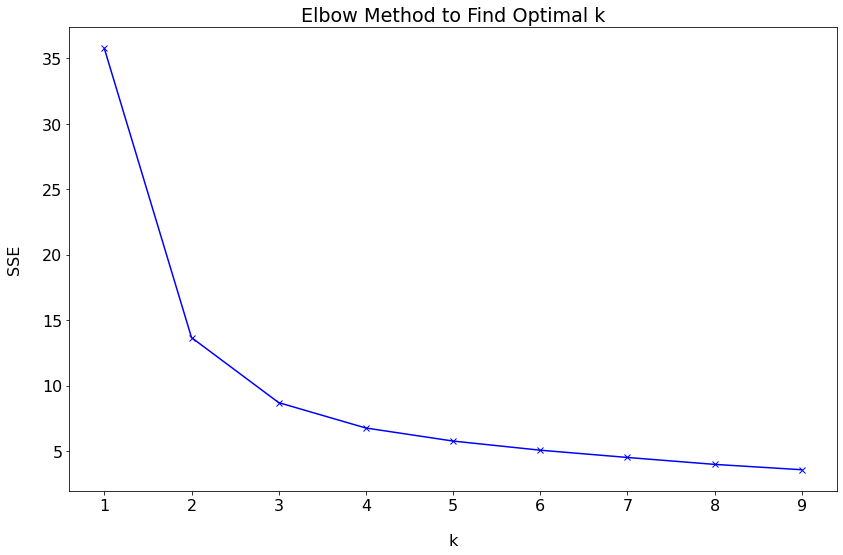

In [85]:
cluster_vars = ['spl_theme1_scaled', 'ep_pov_scaled', 'e_pov_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars)

In [86]:
train_clusters, kmeans = explore.run_kmeans(train_exp, X_train_scaled, k=3, cluster_vars=cluster_vars, cluster_col_name = 'poverty_cluster')
test_clusters = explore.kmeans_transform(X_test_scaled, kmeans, cluster_vars, cluster_col_name = 'poverty_cluster')

In [87]:

train_clusters, kmeans = explore.run_kmeans(train_exp, X_train_scaled, k=3, cluster_vars=cluster_vars, cluster_col_name = 'poverty_cluster')
test_clusters = explore.kmeans_transform(X_test_scaled, kmeans, cluster_vars, cluster_col_name = 'poverty_cluster')

In [88]:

centroids = explore.get_centroids(cluster_vars, cluster_col_name='poverty_cluster', kmeans= kmeans)

In [89]:

train_exp = explore.add_to_train(train_clusters, centroids, train_exp, cluster_col_name = 'poverty_cluster')

In [90]:
# export train_exp for Tableau
#train_exp.to_csv('train_exp_mapping.csv')

In [91]:
train_exp.head()

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall,poverty_cluster,centroid_spl_theme1_scaled,centroid_ep_pov_scaled,centroid_e_pov_scaled
289,48029181821,328,8.8,1.3480,0.4879,0,0,0,0,0,...,0,0,0,0,0,0,0,0.243449,0.095138,0.096143
200,48029171902,3712,25.5,2.9506,0.6394,0,0,0,0,0,...,0,0,0,1,0,0,2,0.815684,0.485412,0.435892
69,48029130200,340,19.2,3.0120,0.6523,0,0,0,0,0,...,0,0,0,0,1,0,1,0.560423,0.254288,0.211310
29,48029121120,143,2.7,0.8444,0.0872,0,0,0,0,0,...,1,0,1,0,0,0,0,0.243449,0.095138,0.096143
12,48029120502,1766,31.8,3.4352,0.9531,0,0,0,0,0,...,1,1,0,0,0,0,2,0.815684,0.485412,0.435892


In [92]:
long_lat = pd.read_csv('FIPS_long_lat.csv')

In [93]:
long_lat

,USPS,GEOID,INTPTLAT,INTPTLONG
0,TX,48001950100,31.971468,-95.552444
1,TX,48001950401,31.734637,-95.815710
2,TX,48001950402,31.800052,-95.913110
3,TX,48001950500,31.787885,-95.640537
4,TX,48001950600,31.750205,-95.669209
...,...,...,...,...
5260,TX,48505950400,26.996981,-99.182603
5261,TX,48507950100,28.957194,-99.612423
5262,TX,48507950200,28.980591,-99.952092
5263,TX,48507950301,28.761956,-99.790649


In [94]:
merge_ll_train = pd.merge(train_exp, long_lat, left_on='tract', right_on='GEOID', how='left')

In [95]:
merge_ll_train.head()

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,r_status_fall,r_trans_fall,poverty_cluster,centroid_spl_theme1_scaled,centroid_ep_pov_scaled,centroid_e_pov_scaled,USPS,GEOID,INTPTLAT,INTPTLONG
0,48029181821,328,8.8,1.3480,0.4879,0,0,0,0,0,...,0,0,0,0.243449,0.095138,0.096143,TX,48029181821,29.540713,-98.623809
1,48029171902,3712,25.5,2.9506,0.6394,0,0,0,0,0,...,0,0,2,0.815684,0.485412,0.435892,TX,48029171902,29.434723,-98.657214
2,48029130200,340,19.2,3.0120,0.6523,0,0,0,0,0,...,1,0,1,0.560423,0.254288,0.211310,TX,48029130200,29.415824,-98.467376
3,48029121120,143,2.7,0.8444,0.0872,0,0,0,0,0,...,0,0,0,0.243449,0.095138,0.096143,TX,48029121120,29.557548,-98.437245
4,48029120502,1766,31.8,3.4352,0.9531,0,0,0,0,0,...,0,0,2,0.815684,0.485412,0.435892,TX,48029120502,29.504533,-98.407621


In [96]:
# export train_exp for Tableau
merge_ll_train.to_csv('train_exp_wll.csv')

In [97]:
# create Dallas .csv for Tableau

In [98]:
ddf, dtrain_exp, dX_train_scaled, dy_train, dX_test_scaled, yd_test = wrangle.wrangle_dallas_data()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


In [99]:
dcluster_vars = ['spl_theme1_scaled', 'ep_pov_scaled', 'e_pov_scaled']
#explore.elbow_plot(dX_train_scaled, cluster_vars)

In [100]:

dtrain_clusters, dkmeans = explore.run_kmeans(dtrain_exp, dX_train_scaled, k=4, cluster_vars=dcluster_vars, cluster_col_name = 'dpoverty_cluster')


In [101]:
dcentroids = explore.get_centroids(dcluster_vars, cluster_col_name='dpoverty_cluster', kmeans= dkmeans)

In [102]:
dtrain_exp = explore.add_to_train(dtrain_clusters, dcentroids, dtrain_exp, cluster_col_name = 'dpoverty_cluster')


In [103]:
dmerge_ll_train = pd.merge(dtrain_exp, long_lat, left_on='tract', right_on='GEOID', how='left')

In [104]:
# export train_exp for Tableau
dmerge_ll_train.to_csv('Dallas_train_exp_wll.csv')

In [105]:
svi_features = svi[['tract', 'rising', 'falling', 'delta', 'avg3yr', 
                    'r_soci_rise', 'r_comp_rise', 'r_status_rise', 'r_trans_rise', 
                   'r_soci_fall', 'r_comp_fall', 'r_status_fall', 'r_trans_fall']]

In [106]:
svi_features.head()

,tract,rising,falling,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
40,48001950500,0,0,0.0829,0.852233,0,0,1,0,0,0,0,0
41,48001950600,0,0,0.0663,0.642000,0,0,1,0,0,0,0,0
42,48001950800,1,0,0.1949,0.527033,1,0,1,0,0,0,0,1
43,48003950100,0,0,0.1230,0.218700,0,0,0,0,0,1,0,1
44,48003950200,1,0,0.3256,0.535067,1,0,1,1,0,1,0,0


In [107]:
svi_features.to_csv('svi_features.csv')

In [108]:
# merge svi features to df after prepare, before split and scale
df2split = pd.merge(df, svi_features, on='tract')

In [109]:
df2split

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta_y,avg3yr_y,r_soci_rise_y,r_comp_rise_y,r_status_rise_y,r_trans_rise_y,r_soci_fall_y,r_comp_fall_y,r_status_fall_y,r_trans_fall_y
0,48029110100,513,20.8,1.8960,0.6503,0,0,0,0,0,...,0.0763,0.710733,1,0,1,0,0,1,0,0
1,48029110300,1057,35.1,2.9638,0.6978,1,1,0,0,2,...,0.0462,0.754767,0,1,0,0,0,0,0,1
2,48029110500,1623,68.0,3.9778,0.9770,1,1,1,1,4,...,0.0367,0.968700,0,0,1,1,0,1,0,0
3,48029110600,1441,51.1,3.8270,0.9841,1,1,1,1,4,...,0.0263,0.982533,0,0,0,1,1,0,0,0
4,48029110700,376,33.8,3.4805,0.9378,0,0,1,0,1,...,0.0255,0.945667,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,48029192100,118,5.7,0.9579,0.3829,0,0,0,0,0,...,0.0130,0.418033,0,0,1,0,1,0,0,0
358,48029192200,496,21.4,2.2141,0.6125,0,0,0,0,0,...,0.0440,0.677867,0,0,0,0,0,1,0,0
359,48029192300,399,8.0,0.7303,0.1911,0,0,0,0,0,...,0.0863,0.152333,0,0,0,1,0,0,0,0
360,48029980003,77,10.9,1.9445,0.1477,0,0,0,0,0,...,0.1840,0.118400,1,1,0,0,0,0,0,0


In [110]:
svi['rank_svi'] = pd.cut(svi.raw_svi2018, bins = [0, .27, .5, .75, 1], labels = [4, 3, 2, 1])

In [111]:
stdvev1 = svi[svi.rank_svi == 1].raw_svi2018.std()
stdvev1

0.07097805236679883

In [112]:
stdvev2 = svi[svi.rank_svi == 2].raw_svi2018.std()
stdvev2

0.07170512305732914

In [113]:
stdvev3 = svi[svi.rank_svi == 3].raw_svi2018.std()
stdvev3

0.06520508034873326

In [114]:
stdvev4 = svi[svi.rank_svi == 4].raw_svi2018.std()
stdvev4

0.07887752533671927

- get 2018, 2016, 2014 historical SVI data .csv
    - note: 2010 is not available sorted by state
    - need to watch for possible issues with tract/FIPS changes creating null values
- get the rank/raw score for each theme and total by census track for each year available
- merge these back together on FIPS and watch for nulls
- change up or down from previous year
- stddev
- %/amount change year over year?


Groupings/Themes
- theme1 = socioeconomic status
- theme2 = household composition and disability
- theme3 = minority and language status
- theme4 = housing type and transportation


- NOTE: excluding 2010 because shape and columns in .csv are substantially different, will only got back to 2014

In [115]:
# get 2018 by census tract
SVI2018 = pd.read_csv('data_csv_files/SVI2018_US.csv')

In [116]:
SVI2018.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,1,ALABAMA,AL,1015,Calhoun,1015981901,"Census Tract 9819.01, Calhoun County, Alabama",24.243865,0,12,...,-999,-999,-999,-999,-999,0,12,-999.0,-999.0,656
1,1,ALABAMA,AL,1015,Calhoun,1015981902,"Census Tract 9819.02, Calhoun County, Alabama",34.646714,0,12,...,-999,-999,-999,-999,-999,0,12,-999.0,-999.0,146
2,1,ALABAMA,AL,1015,Calhoun,1015981903,"Census Tract 9819.03, Calhoun County, Alabama",13.926276,0,12,...,-999,-999,-999,-999,-999,0,12,-999.0,-999.0,0
3,1,ALABAMA,AL,1097,Mobile,1097003605,"Census Tract 36.05, Mobile County, Alabama",0.732300,899,316,...,0,-999,1,-999,-999,33,36,3.7,4.1,5135
4,1,ALABAMA,AL,1097,Mobile,1097990000,"Census Tract 9900, Mobile County, Alabama",0.000000,0,12,...,-999,-999,-999,-999,-999,0,12,-999.0,-999.0,0


In [117]:
# filter for just TX
SVI2018 = SVI2018[SVI2018.STATE == 'TEXAS']

In [118]:
SVI2018.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
522,48,TEXAS,TX,48027,Bell,48027980001,"Census Tract 9800.01, Bell County, Texas",22.290429,73,26,...,0,-999,1,-999,-999,0,13,-999.0,-999.0,1630
523,48,TEXAS,TX,48027,Bell,48027980002,"Census Tract 9800.02, Bell County, Texas",2.897135,0,13,...,-999,-999,-999,-999,-999,0,13,-999.0,-999.0,1093
524,48,TEXAS,TX,48027,Bell,48027980003,"Census Tract 9800.03, Bell County, Texas",56.647697,0,13,...,-999,-999,-999,-999,-999,0,13,-999.0,-999.0,415
525,48,TEXAS,TX,48029,Bexar,48029980001,"Census Tract 9800.01, Bexar County, Texas",48.817455,0,13,...,-999,-999,-999,-999,-999,0,13,-999.0,-999.0,625
526,48,TEXAS,TX,48029,Bexar,48029980002,"Census Tract 9800.02, Bexar County, Texas",0.601487,0,13,...,-999,-999,-999,-999,-999,0,13,-999.0,-999.0,1264


In [119]:
# get list of all raw/rank SVI score columns
rpl_list18 = [col for col in SVI2018.columns if col.startswith('R')]

In [120]:
rpl_list18

['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES']

In [121]:
# create dataframe with just the raw/rank score columns
df2018 = SVI2018[[c for c in SVI2018.columns if c in rpl_list18]]

In [122]:
# rename columns
df2018.rename(columns = {'RPL_THEMES': 'raw_svi2018', 
                     "RPL_THEME1": "r_soci_total2018", 
                     "RPL_THEME2": "r_comp_total2018", 
                     "RPL_THEME3": "r_status_total2018", 
                     "RPL_THEME4": "r_trans_total2018"}, inplace = True)

In [123]:
# add back county, FIPS, population
df2018['county'] = SVI2018.COUNTY
df2018['tract'] = SVI2018.FIPS
df2018['est_population2018'] = SVI2018.E_TOTPOP

In [124]:
df2018.head()

,r_soci_total2018,r_comp_total2018,r_status_total2018,r_trans_total2018,raw_svi2018,county,tract,est_population2018
522,-999.0,-999.0,0.4154,-999.0,-999.0,Bell,48027980001,73
523,-999.0,-999.0,-999.0000,-999.0,-999.0,Bell,48027980002,0
524,-999.0,-999.0,-999.0000,-999.0,-999.0,Bell,48027980003,0
525,-999.0,-999.0,-999.0000,-999.0,-999.0,Bexar,48029980001,0
526,-999.0,-999.0,-999.0000,-999.0,-999.0,Bexar,48029980002,0


In [125]:
df2018.shape

(5254, 8)

In [126]:
# note 2016 is already filtered down to TX only
SVI2016 = pd.read_csv('data_csv_files/TX_SVI_census2016.csv')

In [127]:
SVI2016.head()

,FID,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,0,48,TEXAS,TX,48027,Bell,48027980002,"Census Tract 9800.02, Bell County, Texas",2.897135,0.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,13.0,-999.0,-999.0,963.0
1,1,48,TEXAS,TX,48027,Bell,48027980003,"Census Tract 9800.03, Bell County, Texas",56.658465,0.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,13.0,-999.0,-999.0,344.0
2,2,48,TEXAS,TX,48029,Bexar,48029980001,"Census Tract 9800.01, Bexar County, Texas",48.817451,0.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,13.0,-999.0,-999.0,1654.0
3,3,48,TEXAS,TX,48029,Bexar,48029980004,"Census Tract 9800.04, Bexar County, Texas",3.779800,0.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,13.0,-999.0,-999.0,5697.0
4,4,48,TEXAS,TX,48039,Brazoria,48039990000,"Census Tract 9900, Brazoria County, Texas",0.000000,0.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,13.0,-999.0,-999.0,0.0


In [128]:
rpl_list16 = [col for col in SVI2016.columns if col.startswith('R')]

In [129]:
rpl_list16

['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES']

In [130]:
# create dataframe with just the raw/rank score columns
df2016 = SVI2016[[c for c in SVI2016.columns if c in rpl_list16]]

In [131]:
# rename columns
df2016.rename(columns = {'RPL_THEMES': 'raw_svi2016', 
                     "RPL_THEME1": "r_soci_total2016", 
                     "RPL_THEME2": "r_comp_total2016", 
                     "RPL_THEME3": "r_status_total2016", 
                     "RPL_THEME4": "r_trans_total2016"}, inplace = True)

In [132]:
# add back county, FIPS, population
#df2016['county2016'] = SVI2016.COUNTY
df2016['tract'] = SVI2016.FIPS
df2016['est_population2016'] = SVI2016.E_TOTPOP

In [133]:
df2016.head()


,r_soci_total2016,r_comp_total2016,r_status_total2016,r_trans_total2016,raw_svi2016,tract,est_population2016
0,-999.0,-999.0,-999.0,-999.0,-999.0,48027980002,0.0
1,-999.0,-999.0,-999.0,-999.0,-999.0,48027980003,0.0
2,-999.0,-999.0,-999.0,-999.0,-999.0,48029980001,0.0
3,-999.0,-999.0,-999.0,-999.0,-999.0,48029980004,0.0
4,-999.0,-999.0,-999.0,-999.0,-999.0,48039990000,0.0


In [134]:
df2016.shape

(5254, 7)

In [135]:
# note 2014 is already filtered down to TX only
SVI2014 = pd.read_csv('TX_SVI_census2014.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'TX_SVI_census2014.csv'

In [ ]:
rpl_list14 = [col for col in SVI2014.columns if col.startswith('R')]
rpl_list14

In [ ]:
# create dataframe with just the raw/rank score columns
df2014 = SVI2014[[c for c in SVI2014.columns if c in rpl_list14]]

In [ ]:
# rename columns
df2014.rename(columns = {'RPL_THEMES': 'raw_svi2014', 
                     "RPL_THEME1": "r_soci_total2014", 
                     "RPL_THEME2": "r_comp_total2014", 
                     "RPL_THEME3": "r_status_total2014", 
                     "RPL_THEME4": "r_trans_total2014"}, inplace = True)

In [ ]:
# add back county, FIPS, population
#df2014['county2014'] = SVI2014.COUNTY
df2014['tract'] = SVI2014.FIPS
df2014['est_population2014'] = SVI2014.E_TOTPOP

In [ ]:
df2014.head()


In [ ]:
df2014.shape

In [ ]:
# get 2010 by census tract
SVI2010 = pd.read_csv('SVI2010_US.csv')

In [ ]:
# DO NOT USE - not worth time to sort
SVI2010.head()

In [ ]:
# merge the 2018, 2016, and 2014 dateframes on census_tract
# all are same shape = (5254, 8), use left merge just in case so don't lose any 2018 data
SVI_hist = pd.merge(df2018, df2016, on='tract', how='left')

In [ ]:
SVI_hist.shape

In [ ]:
SVI_hist.columns

In [ ]:
SVI_hist_full = pd.merge(SVI_hist, df2014, on='tract', how='left')

In [ ]:
SVI_hist_full.shape

In [ ]:
SVI_hist_full.head()

In [ ]:
# now drop any -999.0 observations, per CDC these were removed during ranking
SVI_hist_full = SVI_hist_full[SVI_hist_full.raw_svi2018 != -999.0]

In [ ]:
SVI_hist_full.head()

In [ ]:
SVI_hist_full.shape

In [ ]:
SVI_hist_full.columns

In [ ]:
svi_histdf = SVI_hist_full[['county', 'tract', 'raw_svi2018', 'raw_svi2016', 'raw_svi2014', 
               'r_soci_total2018', 'r_comp_total2018', 'r_status_total2018', 'r_trans_total2018',
              'r_soci_total2016', 'r_comp_total2016', 'r_status_total2016', 'r_trans_total2016', 
              'r_soci_total2014', 'r_comp_total2014', 'r_status_total2014', 'r_trans_total2014',
              'est_population2018', 'est_population2016', 'est_population2014']]

In [ ]:
svi_histdf.head()

In [ ]:
# write combined file to csv
svi_histdf.to_csv('SVI_history.csv')

In [ ]:
# test wrangle
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

In [ ]:
sa = acquire.get_san_antonio_data()

In [ ]:
sa.head()

In [ ]:
sasvi = acquire.get_sa_svi_data()

In [ ]:
sasvi.head()

In [ ]:
huddf = acquire.get_HUD(sasvi)

In [ ]:
huddf.head()

In [ ]:
huddf.shape

In [ ]:
merge_bexar = sa[['zip', 'population', 'positive', 'casesp100000']]

In [ ]:
svi_zip = pd.merge(sasvi, huddf, on='tract', how='left')

In [ ]:
svi_zip.isna().sum()


In [ ]:
svi_zip.shape

In [ ]:
svi_zip_cases = pd.merge(svi_zip, merge_bexar, on='zip', how='left')

In [ ]:
svi_zip_cases.head()

In [ ]:
svi_zip_cases.isna().sum()

In [ ]:
svi_zip_cases.shape

In [ ]:
# testing
df = acquire.run()
df = prepare.prepare_data(df)
df.head()

In [ ]:
df.columns

In [ ]:
# full acquire test
df = acquire.run()

In [ ]:
# test acquire import Bexar data
bexar = acquire.get_san_antonio_data()
bexar.head()

In [ ]:
# test acquire import svi data
svi = acquire.get_svi_data()
svi.head()

In [ ]:
# test acquire get HUD merge df
merge_HUD = acquire.get_HUD(bexar)

In [ ]:
merge_HUD.head()

In [ ]:
# import Bexar cases dataframe
bexar_cases = pd.read_csv('Bexar_County_COVID-19_Data_by_Zip_Code.csv', index_col=0)
bexar_cases.columns = bexar_cases.columns.str.lower()
bexar_cases.head()

In [ ]:
bexar_cases.info()

In [ ]:
# how many unique zip codes are in the cases df?
bexar_cases.nunique()

In [ ]:
# import san antonio svi index dataframe
svidf = pd.read_csv('san_antonio_2018_tract.csv')
svidf.columns = svidf.columns.str.lower()
svidf = svidf.rename(columns={'fips': 'tract'})
svidf.head()

In [ ]:
# how many unique FIPS ids are in the svi df?
svidf.tract.value_counts()

In [ ]:
# get list of unique zip codes in the bexar cases df
bexar_zip = bexar_cases.zip_code.tolist()

In [ ]:
# import track to zip dataframe
zips = pd.read_csv('TRACT_ZIP_122018_78s_only.csv')
# filter the zips df to only those in the bexar zip list
zips = zips[zips.zip.isin(bexar_zip)]
zips

In [ ]:
# view zips sorted by tract and total ratio
zips.sort_values(by=['tract', 'tot_ratio'], ascending=[True, False]).head()

In [ ]:
# verify that .08 is highest for tract 48493000201
zips[zips.tract == 48493000201]

In [ ]:
# aggregate the data frame to get the zip code with the max ratio by tract
zipsdf = zips.groupby(['tract'])['tot_ratio', 'zip'].agg({'tot_ratio':['max'], 'zip':['first']})
zipsdf.columns = [' '.join(col).strip() for col in zipsdf.columns.values]
zipsdf = zipsdf.reset_index()

In [ ]:
zipsdf.head()

In [ ]:
# the svi only has 366 rows, hopefully they are all in this list
len(zipsdf)

In [ ]:
# create merge df to test merging
merge_zip3 = zipsdf[['tract', 'zip first']]

In [ ]:
merge_zip3 = merge_zip3.rename(columns={'zip first':'zip'})

In [ ]:
merge_zip3

In [ ]:
# create new df merging svi and 2nd merge zip file on tract
svi_zip2 = pd.merge(svidf, merge_zip3, on='tract', how='left')
svi_zip2.shape

In [ ]:
# check for nulls
svi_zip2.isna().sum()

In [ ]:
# create dataframe to merge with svi
merge_bexar = bexar[['zip', 'population', 'positive', 'casesp100000']]
merge_bexar.head()

In [ ]:
# merge svi_zip with merge_bexar
full = pd.merge(svi_zip2, merge_bexar, on='zip', how='left')
full.head()

In [ ]:
max_ratio = zips.groupby('tract')[['tot_ratio']].max()

In [ ]:
max_ratio = max_ratio.reset_index()

In [ ]:
max_ratio.head()

In [ ]:
max_ratio.nunique()

In [ ]:
zips[zips.zip == 78219]

In [ ]:
# requiring the total ratio to be 54% or higher per track gives the closest to 366 without going over
# there will be 4 zip codes not represented and 2 census tracks not represented
# when merged we should get null values for these
zip_54 = zips[zips.tot_ratio >= .54]
zip_54.nunique()

In [ ]:
# create df with only values to merge
merge_zip = zip_54[['tract', 'zip']]
merge_zip

In [ ]:
# create new df merging svi and merge zip on tract
fulldf = pd.merge(svidf, merge_zip, on='tract', how='left')
fulldf.shape

In [ ]:
# will need to convert zip to int
type(fulldf.zip[0])

In [ ]:
# there are 21 tract ids that do not have a zip code
fulldf.isna().sum()

In [ ]:
# create a df of just the row with a null zip code
missing_zip = fulldf[fulldf.zip.isna()]

In [ ]:
missing_zip

In [ ]:
# here is a list of the tracts missing zip codes
missing_zip.tract.value_counts()

In [ ]:
# find value for 48029131802
zips[zips.tract == 48029131802]
# assign 78101 to this track = highest % addresses

In [ ]:
# find value for 48029182103
zips[zips.tract == 48029182103]
# assign 78023 to this track = highest % addresses

In [ ]:
# find value for 48029980004
zips[zips.tract == 48029980004]
# assign 78216 to this track = highest % addresses

In [ ]:
# find value for 48029130402
zips[zips.tract == 48029130402]
# assign 78210 to this track = highest % addresses

In [ ]:
# find value for 48029141900
zips[zips.tract == 48029141900]
# assign 78263 to this track = highest % addresses

In [ ]:
# find value for 48029191503
zips[zips.tract == 48029191503]
# assign 78249 to this track = highest % addresses

In [ ]:
# find value for 48029181704
zips[zips.tract == 48029181704]
# assign 78238 to this track = highest % addresses

In [ ]:
# find value for 48029131700
zips[zips.tract == 48029131700]
# assign 78148 to this track = highest % addresses

In [ ]:
# find value for 48029121205
zips[zips.tract == 48029121205]
# assign 78233 to this track = highest % addresses

In [ ]:
# find value for 48029110100
zips[zips.tract == 48029110100]
# assign 78205 to this track = highest % addresses

In [ ]:
# find value for 48029182102
zips[zips.tract == 48029182102]
# assign 78255 to this track = highest % addresses

In [ ]:
# find value for 48029192100
zips[zips.tract == 48029192100]
# assign 78204 to this track = highest % addresses

In [ ]:
# find value for 48029121905
zips[zips.tract == 48029121905]
# assign 78259 to this track = highest % addresses

In [ ]:
# find value for 48029130800
zips[zips.tract == 48029130800]
# assign 78219 to this track = highest % addresses

In [ ]:
# find value for 48029121203
zips[zips.tract == 48029121203]
# assign 78233 to this track = highest % addresses

In [ ]:
# find value for 48029171602
zips[zips.tract == 48029171602]
# assign 78227 to this track = highest % addresses

In [ ]:
# find value for 48029181725
zips[zips.tract == 48029181725]
# assign 78251 to this track = highest % addresses

In [ ]:
# find value for 48029150300
zips[zips.tract == 48029150300]
# assign 78214 to this track = highest % addresses

In [ ]:
# find value for 48029191504
zips[zips.tract == 48029191504]
# assign 78231 to this track = highest % addresses

In [ ]:
# find value for 48029191004
zips[zips.tract == 48029191004]
# assign 78216 to this track = highest % addresses

In [ ]:
# find value for 48029130500
zips[zips.tract == 48029130500]
# assign 78202 to this track = highest % addresses

In [ ]:
tracts_list = missing_zip.tract.tolist()

In [ ]:
assign_zip_list = [78101, 78023, 78216, 78210, 78263, 78249, 78238, 78148, 78233, 78205, 78255, 78204, 78259,
                   78219, 78233, 78227, 78251, 78214, 78231, 78216, 78202]

In [ ]:
len(tracts_list)

In [ ]:
len(assign_zip_list)

In [ ]:
# verified lists are same length, now zip lists together into df to merge back to fulldf
# https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/#:~:text=Create%20pandas%20dataframe%20from%20lists%20using%20zip%20Second,it%20to%20produce%20one%20item%20at%20a%20time.
data_to_add = pd.DataFrame()
data_to_add['tract'] = tracts_list
data_to_add['zip'] = assign_zip_list
data_to_add

In [ ]:
# add these values to the merge zip df
merge_zip2 = merge_zip.append(data_to_add)

In [ ]:
len(merge_zip2)

In [ ]:
# create new df merging svi and 2nd merge zip file on tract
svi_zip = pd.merge(svidf, merge_zip2, on='tract', how='left')
svi_zip.shape

In [ ]:
# check for nulls
svi_zip.isna().sum()

In [ ]:
svi_zip.head()

In [ ]:
bexar_cases.head()

In [ ]:
# rename the zip code column to merge on
bexar_cases = bexar_cases.rename(columns={'zip_code': 'zip', 'populationtotals_totpop_cy': 'population'})

In [ ]:
bexar_cases

In [ ]:
# create dataframe to merge with svi
merge_bexar = bexar_cases[['zip', 'population', 'positive', 'casesp100000']]
merge_bexar.head()

In [ ]:
# merge svi_zip with merge_bexar
svi_zip_cases = pd.merge(svi_zip, merge_bexar, on='zip', how='left')
svi_zip_cases.head()

In [ ]:
# check for nulls
svi_zip_cases.isna().sum()

In [ ]:
# write final compliation to csv
#svi_zip_cases.to_csv('full_san_antonio.csv')